In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
data = pd.read_csv('C:\\Users\\User\\Desktop\\kmeans\\dataset_norm.csv')
data.head()
#############################################
radiofeature = data.loc[:, 'ADC(10-3mm2/s)':'Kpa']
label = data['Customlabel']
radiofeature.insert(0, "Customlabel", label, True)
radiofeature['Customlabel'] = radiofeature['Customlabel'].map({'Normal': 0, 'Fat': 1, 'Fibrosis': 2})
radiofeature.head()


,Customlabel,ADC(10-3mm2/s),Dapp(10-3mm2/s),Kapp,FF(%),D*(10-3mm2/s),D(10^-3),f(%),Kpa
0,0,0.813388,0.586357,0.449992,0.137188,0.888889,0.634109,0.740978,0.300000
1,0,0.682775,0.470573,0.483713,0.147164,0.644922,0.589743,0.496404,0.433333
2,0,0.753347,0.511848,0.365092,0.137683,0.513549,0.671412,0.311964,0.550000
3,0,0.637752,0.416893,0.547105,0.047433,0.707026,0.510620,0.411011,0.433333
4,0,0.710831,0.668081,0.559145,0.015445,0.908615,0.556002,0.634467,0.483333


In [3]:
d = radiofeature
d_melt = pd.melt(d, id_vars=['Customlabel'], value_vars=['ADC(10-3mm2/s)', 'Dapp(10-3mm2/s)', 'Kapp', 'FF(%)',
       'D*(10-3mm2/s)', 'D(10^-3)', 'f(%)', 'Kpa'])
# replace column names
d_melt.columns = ['Customlabel', 'parameter', 'value']
d_melt.head()


,Customlabel,parameter,value
0,0,ADC(10-3mm2/s),0.813388
1,0,ADC(10-3mm2/s),0.682775
2,0,ADC(10-3mm2/s),0.753347
3,0,ADC(10-3mm2/s),0.637752
4,0,ADC(10-3mm2/s),0.710831


# generate a boxplot to see the data distribution by genotypes and years. Using boxplot, we can easily detect the 
# differences between different groups

<AxesSubplot:xlabel='Customlabel', ylabel='value'>

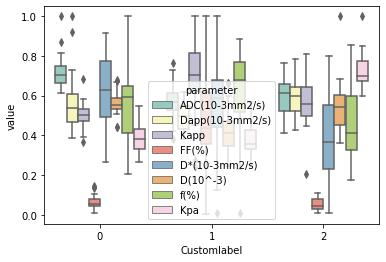

In [4]:
sns.boxplot(x="Customlabel", y="value", hue="parameter", data=d_melt, palette="Set3") 


In [5]:
df = radiofeature

# create function for summary data
# Create function to display distribution pairplot

In [6]:
def overview(df):
    #docstring
    '''
    Read a csv file into a DataFrame.
    Print first 5 rows of data.
    Print datatype for each column.
    Print number of NULL/NaN values for each column.
    Print summary data.
    
    Return:
    data, rtype: DataFrame
    '''
    print("The first 5 rows of data are:\n", df.head())
    print("\n")
    print("The (Row,Column) is:\n", df.shape)
    print("\n")
    print("Data type of each column:\n", df.dtypes)
    print("\n")
    print("The number of null values in each column are:\n", df.isnull().sum())
    print("\n")
    print("Summary of data:\n", df.describe())
    return


def distribution(dataset, variable):
    '''
    Args:
        dataset: Include the DataFrame here
        variable: Include the column from dataframe used for color encoding
    Returns:
        sns pairplot with color encoding
    '''
    
    g = sns.pairplot(data = dataset, hue = variable, size = 1)
    g.fig.suptitle('Graph showing distribution between scores and {}'.format(variable), fontsize=7)
    g.fig.subplots_adjust(top=0.9)
   
    return g

In [7]:
overview(df)

The first 5 rows of data are:
    Customlabel  ADC(10-3mm2/s)  Dapp(10-3mm2/s)      Kapp     FF(%)  \
0            0        0.813388         0.586357  0.449992  0.137188   
1            0        0.682775         0.470573  0.483713  0.147164   
2            0        0.753347         0.511848  0.365092  0.137683   
3            0        0.637752         0.416893  0.547105  0.047433   
4            0        0.710831         0.668081  0.559145  0.015445   

   D*(10-3mm2/s)  D(10^-3)      f(%)       Kpa  
0       0.888889  0.634109  0.740978  0.300000  
1       0.644922  0.589743  0.496404  0.433333  
2       0.513549  0.671412  0.311964  0.550000  
3       0.707026  0.510620  0.411011  0.433333  
4       0.908615  0.556002  0.634467  0.483333  


The (Row,Column) is:
 (70, 9)


Data type of each column:
 Customlabel          int64
ADC(10-3mm2/s)     float64
Dapp(10-3mm2/s)    float64
Kapp               float64
FF(%)              float64
D*(10-3mm2/s)      float64
D(10^-3)           float6

In [8]:
df.columns

Index(['Customlabel', 'ADC(10-3mm2/s)', 'Dapp(10-3mm2/s)', 'Kapp', 'FF(%)',
       'D*(10-3mm2/s)', 'D(10^-3)', 'f(%)', 'Kpa'],
      dtype='object')

C:\Users\User\anaconda3\envs\ganzer\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


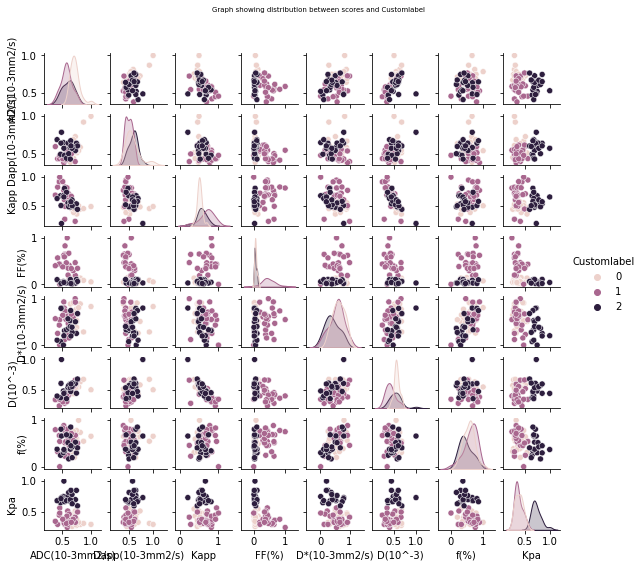

In [9]:
distribution(df, 'Customlabel')

In [10]:
df.columns = ['Customlabel', 'ADC', 'Dapp', 'Kapp', 'FF',
       'Dstar', 'D', 'f', 'Kpa']

# Create anova test function

In [11]:
def anova_test(data, variable):
    '''
    Args: 
        data = (DataFrame)
        variable = Categorical column used for 1-way ANOVA test
    Returns: Nothing
    '''
    x = ['Customlabel', 'ADC', 'Dapp', 'Kapp', 'FF', 'Dstar', 'D', 'f', 'Kpa']
    for i,k in enumerate(x):
        lm = ols('{} ~ {}'.format(x[i],variable), data=data).fit()
        table = sm.stats.anova_lm(lm)
        print(':::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
        print("P-value for 1-way ANOVA test between {} and {} is ".format(x[i],variable),table.loc[variable,'PR(>F)'])
        print(lm.summary())   
        print(':::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')

In [12]:
anova_test(df, 'Customlabel')


:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
P-value for 1-way ANOVA test between Customlabel and Customlabel is  0.0
                            OLS Regression Results                            
Dep. Variable:            Customlabel   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.903e+32
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:04:56   Log-Likelihood:                 2396.2
No. Observations:                  70   AIC:                            -4788.
Df Residuals:                      68   BIC:                            -4784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|